# Using matplotlib and ipywidgets.interact
 In this tutorial, I will demonstrait how to make interactive graphs.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, Select, IntSlider, FloatSlider, Text

## Sample code for using ipywidgets.interact

In [2]:
def select_test(selection1, selection2, intdata, floatdata, text):
    print(selection1)
    print(selection2)
    print(intdata)
    print(floatdata)
    print(text)
    
select1 = Select(description="Select", options=["Option A", "Option B", "Option C"], rows=1)
select2 = Select(description="Select", options=["Option A", "Option B", "Option C"], rows=3)
intslider = IntSlider(value=50, min=0, max=100, step=5, description="IntSlider1")
floatslider = FloatSlider(value=0.5, min=0, max=1, step=0.05, description="FloatSlider")
text = Text(placeholder="Enter text", description="Text")
interact(select_test, selection1=select1, selection2=select2, intdata=intslider, floatdata=floatslider, text=text)

interactive(children=(Select(description='Select', options=('Option A', 'Option B', 'Option C'), rows=1, value…

<function __main__.select_test(selection1, selection2, intdata, floatdata, text)>

### Result
The result will look like the following image.
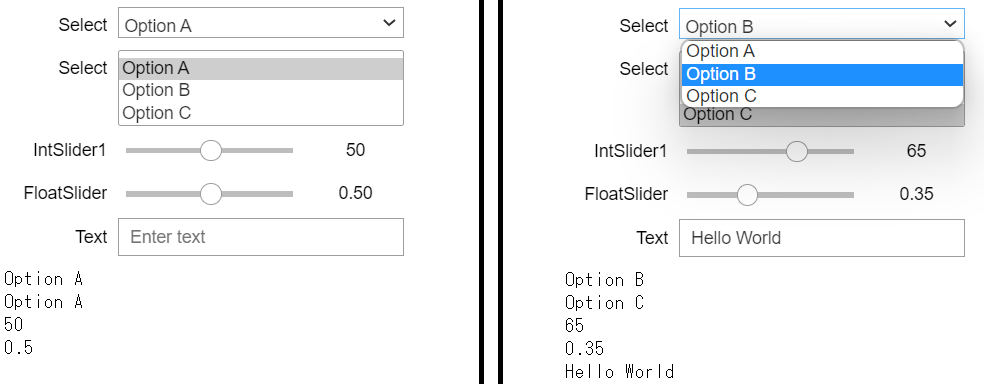

## Generate Sample Data
 Now, I will make a sample data (data measured by electrocardiogram) for the tutorial.
 <b>Remember, the data I will make is only a "sample" and is not an accurate data.<b>

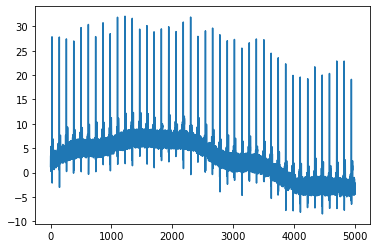

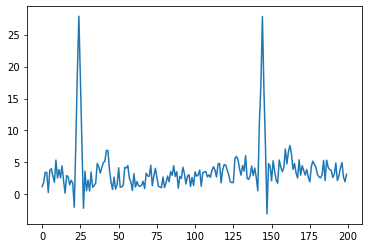

In [3]:
P=np.array([0,1,2,3,4,5,5.5,6.3,6,4,2,0])*0.3
QRS=np.array([0,-3,6,15,24,14,4,-5,0])
T=np.array([0,1,2,3,4,5,5.5,6.3,6,4,2,0])*0.6
def addPulse(data, offset, PQ, ST):
    data[offset:offset+len(P)]+=P
    data[offset+len(P)+PQ:offset+len(P)+PQ+len(QRS)]+=QRS
    data[offset+len(P)+PQ+len(QRS)+ST:offset+len(P)+PQ+len(QRS)+ST+len(T)]+=T

def createSample(length, func, PQ, ST):
    data=np.random.rand((length+len(P)+PQ+len(QRS)+ST+len(T)+1))*4
    data+=np.sin(np.linspace(0, 20, length+len(P)+PQ+len(QRS)+ST+len(T)+1))*0.5
    data+=np.sin(np.linspace(0, 30, length+len(P)+PQ+len(QRS)+ST+len(T)+1))*0.5
    data+=np.sin(np.linspace(0, 5, length+len(P)+PQ+len(QRS)+ST+len(T)+1))*5
    i=0
    while(True):
        offset = func(i)+np.random.randint(0,5)
        if(offset>=length):
            break
        addPulse(data, offset, PQ, ST)
        i+=1
    return data[0:length]
ECG = createSample(5000, lambda i : i*120, 4, 6)
plt.plot(ECG)
plt.show()
plt.plot(ECG[0:200])
plt.show()

Nice sample!

# Peak detection
Next, we want to measure the intervals between spikes.To do this, we need to detect where the peaks are.<br/>
I will use find_peaks() to detect them

In [4]:
from scipy.signal import find_peaks

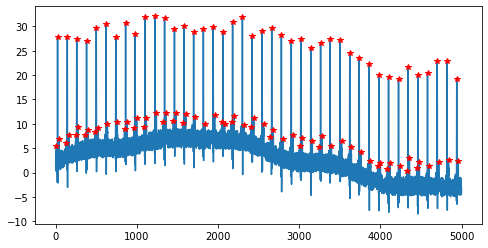

In [5]:
fig=plt.figure(figsize=(8,4))
ax=fig.add_subplot(1,1,1)
ax.plot(ECG)
peaks, properties=find_peaks(ECG, prominence=(5.0, None))
ax.plot(peaks, ECG[peaks], "*", color="red")

Peaks are detected but it mistakenly detects smaller peaks! <br/>
We need to change the threshold, and here is where the interactive plot is useful!

## Changing the threshold interactively

In [6]:
def show_plot(threshold):
    fig=plt.figure(figsize=(8,4))
    ax=fig.add_subplot(1,1,1)
    ax.plot(ECG)
    peaks, properties=find_peaks(ECG, prominence=(threshold, None))
    ax.plot(peaks, ECG[peaks], "*", color="red")
    plt.show()
threshold = FloatSlider(value=5, min=3, max=15, step=0.1, description="Threshold")
interact(show_plot, threshold=threshold)

interactive(children=(FloatSlider(value=5.0, description='Threshold', max=15.0, min=3.0), Output()), _dom_clas…

<function __main__.show_plot(threshold)>

### Result
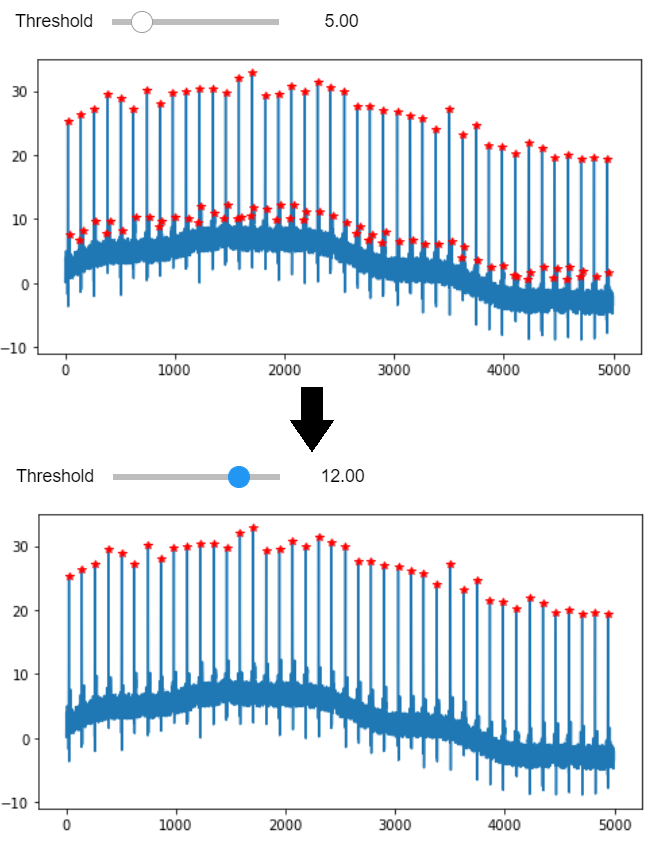

## Plot the intervals!

In [7]:
ECG_with_DrugA = createSample(5000, lambda i : i*120+15*max(0,i-2)*(i-2)//100, 4, 6)
ECG_with_DrugB = createSample(5000, lambda i : i*120-15*max(0,i-2)*(i-2)//100, 4, 6)

In [8]:
ECGs={}
ECGs["No drugs"]=ECG
ECGs["Drug A"]=ECG_with_DrugA
ECGs["Drug B"]=ECG_with_DrugB

In [9]:
def show_plot(sample, threshold):
    fig=plt.figure(figsize=(8,8))
    ax1=fig.add_subplot(2,1,1)
    ax2=fig.add_subplot(2,1,2)
    ax1.plot(ECGs[sample])
    peaks, properties=find_peaks(ECGs[sample], prominence=(threshold, None))
    ax1.plot(peaks, ECGs[sample][peaks], "*", color="red")
    
    for name in ECGs:
        peaks, properties=find_peaks(ECGs[name], prominence=(threshold, None))
        time=(peaks[1:]+peaks[0:-1])/2
        interval=peaks[1:]-peaks[0:-1]
        ax2.plot(time, interval, label=name)
    ax2.legend()
    plt.show()
sample = Select(description="Sample:", options=["No drugs", "Drug A", "Drug B"], rows=1)
threshold = FloatSlider(value=5, min=3, max=15, step=0.1, description="Threshold")
interact(show_plot, sample=sample, threshold=threshold)

interactive(children=(Select(description='Sample:', options=('No drugs', 'Drug A', 'Drug B'), rows=1, value='N…

<function __main__.show_plot(sample, threshold)>

### Result
The result will look like the following image.
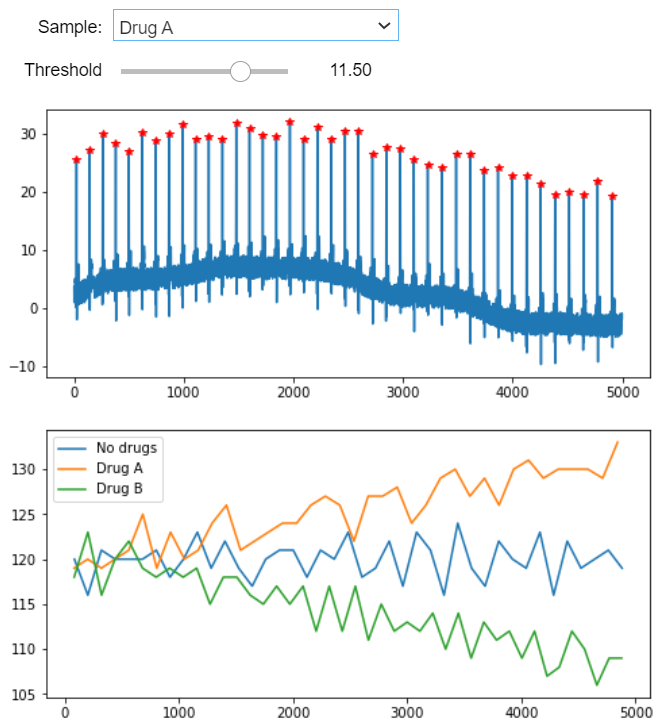